4章

以下のサイトを参考にコードを記述。

https://mori-memo.hateblo.jp/entry/2022/08/17/232118

In [2]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

import MeCab

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcwidget4 libsigc++-2.0-0v5 libxapian30 swig4.0
Suggested packages:
  apt-xapian-index aptitude-doc-en | aptitude-doc debtags tasksel libcwidget-dev xapian-tools
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcwidget4 libsigc++-2.0-0v5 libxapian30 swig swig4.0
0 upgraded, 7 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,954 kB of archives.
After this operation, 22.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aptitude-common all 0.8.13-3ubuntu1 [1,719 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsigc++-2.0-0v5 amd64 2.10.4-2ubuntu3 [12.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcwidget4 amd64 0.5.18-5build1 [306 kB]
Get:

In [3]:
raw_file = './neko.txt'
file = './neko.txt.mecab'
tagger = MeCab.Tagger()

with open(raw_file, 'r', encoding='utf-8') as f1, \
                open(file, 'w', encoding='utf-8') as f2:
    for row in f1:
        f2.write(tagger.parse(row))

In [29]:
def read_mecab(file):
    results = []
    morphs = []
    with open(file, 'r', encoding='utf-8') as f:
        for row in f:
            if row == 'EOS\n':
                if len(morphs):
                    results.append(morphs)
                    morphs = []
            else:
                cols1 = row.split('\t')
                cols2 = cols1[1].split(',')
                morph = {'surface': cols1[0],
                         'base': cols2[6],
                         'pos': cols2[0],
                         'pos1': cols2[1],
                        }
                morphs.append(morph)
    if len(morphs):
        results.append(morphs)
        morphs = []
    return results

results = read_mecab(file)
print(results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
ans = set()
for morphs in results:
    for morph in morphs:
        if morph['pos'] == '動詞':
            ans.add(morph['surface'])

print('動詞の表層形の種類: {}'.format(len(ans)))
for v in list(ans):
    print(v)

動詞の表層形の種類: 3893
き
出会っ
かきまぜ
勝ち
見立て
下げ渡し
撚
もぐり
こ
ひそめ
罵
知らし
洩らし
さがし
割っ
窶す
しくじっ
おか
焦る
纏まる
ぬっ
はおら
病み
さ
咎めん
ほかなら
おっしゃろ
出掛け
思い出し
や
撓り
依っ
召し
売っ
むすん
暮れる
吟じ
比すれ
磨り
背負っ
切り刻ん
取りつい
恥ずる
憤る
見上げ
ささ
すう
生ん
蓄える
取り立て
ふかす
問い
着
疑う
填め
すま
おこ
見廻す
驚く
のしかから
しゃべら
吐い
片付け
ふるえ
相成る
破れ
活け
娶る
有ろ
られる
つき合わ
喫せ
尋ねる
下さい
填める
消す
下がる
掛ける
もらお
あう
損じ
損ね
来し
そろ
終っ
わける
歴
いわ
燃える
数え
騒ぎ立て
弾く
整え
取り払わ
崩す
暮らさ
とる
極め付け
掬い
入っ
優る
敲く
得よ
謹ん
寝つか
擦り
好く
属する
中る
誘い出す
動け
這入ん
越せ
湧き出る
命ずる
属し
弾きゃ
滑り込む
なさい
卸せ
打殺さ
聞え
司
切り付ける
祭り
頑張っ
能う
破
勝た
でる
のぼせ
乗り越え
集まれ
休ん
与
違い
滑べっ
列ね
引き下がっ
飛び下りる
貫く
喜ぶ
すまし
探し
よん
おどかさ
ざれ
出逢え
うく
改める
交ぜ返し
糺し
乗
画い
捻る
着こなし
働か
懸かり
乗り越える
名づける
やれ
積ま
延べ
顧み
起ら
買い
止めよ
いらせられ
叩きつける
つれ
至っ
添う
彩っ
落ちる
かぶせ
有する
帰ろ
割り出さ
捏ね
かん
伺い
求め
まかり
召し上がら
相成り
釣れ
詰まら
捕る
構わ
てりゃ
思い
惚れ込ん
しなび
叩い
飲ん
て
疲れる
勤め
綴る
除け
飛び越え
捕っ
かじっ
言い触らす
寝ぼけ
れりゃ
帰り
くずれ
あたっ
輝い
やって来る
仕立てる
逃げ込む
要する
御する
立て通す
使い
通り抜ける
のぞく
話せ
見
威張っ
変りゃ
図抜け
済ま
適する
引き受け
受け取り
忍び
結え
弁ずる
告げる
証す
威張る
得る
捕え
挙っ
しゃべり
あ
入れよ
誂える
仰向い
挟む
たたき
在っ
わかれる
重ね
逸す
聞く
間に合わ
比し
見合せよ
ころがり
取り留め
頂い
貰い
真似
引き裂い
たれる
蒙ろ
引きかえそ
つぐ
捕れる
振れ
がる
黙っ
廻る
突い
縫っ
教わ

In [6]:
ans = set()
for morphs in results:
    for morph in morphs:
        if morph['pos'] == '動詞':
            ans.add(morph['base'])

print('動詞の基本形の種類: {}'.format(len(ans)))
for v in list(ans):
    print(v)

動詞の基本形の種類: 2300
吹かす
泣かす
剃る
伏す
窶す
思える
突っ込む
いじる
積む
焦る
纏まる
見廻る
跨ぐ
とぶ
似る
まつ
於く
降す
いがみ合う
暮れる
憤る
載る
甘んじる
すう
蓄える
ふかす
きまる
疑う
見廻す
織る
かぐ
驚く
打ち解ける
相成る
経つ
割り出す
知れ渡る
息む
られる
娶る
尋ねる
填める
消す
下がる
見抜く
はみ出す
掛ける
あう
生かす
突き通す
わける
察す
つかみ合う
ねぼける
燃える
弾く
のせる
崩す
錬る
とる
優る
敲く
誘い出す
好く
攫む
属する
中る
念じる
湧き出る
命ずる
振り撒く
促す
滑り込む
撓める
いやす
切り付ける
ぐれる
能う
延べる
睡る
でる
曝す
盛る
係る
つぶやく
詣る
書き入れる
読みかける
受け取る
さえる
届ける
飛び下りる
貫く
喜ぶ
買い被る
成す
うく
改める
捻る
懲りる
乗り越える
名づける
あきれ返る
掠める
呈す
叩きつける
添う
落ちる
逐う
ききつける
あばく
有する
おくれる
緩める
捕る
取り留める
疲れる
綴る
じれる
つかす
言い触らす
設ける
見離す
勤める
はぐる
せく
仕立てる
御する
やって来る
逃げ込む
要する
立て通す
通り抜ける
転じる
のぞく
買い込む
はなつ
適する
弁ずる
告げる
丸める
見識張る
証す
威張る
得る
誂える
挟む
わかれる
逸す
聞く
埋める
関す
釣り込む
たれる
つぐ
踏み付ける
剥く
捕れる
がる
廻る
惚れる
亡ぼす
立ち行く
凝らす
纏める
通ずる
見届ける
素っ破抜く
擦る
縛り付ける
もぐり込む
出直す
認める
放り込む
聞き糺す
飲み干す
まわる
振り落とす
翳す
引っ込む
陣取る
見棄てる
謡う
探る
出会う
寄りつく
かくれる
衝く
腐る
飛び込む
確かめる
奏する
張れる
切れる
行ける
つれる
登る
変じる
向く
刺す
捏ねる
禁ずる
強いる
あらわれる
こぼす
よそう
盛り込む
焦がれる
蹴る
訴える
応じる
だす
聞き惚れる
待ちかねる
裏返す
寄り添う
こまる
よる
あまる
勧める
浸る
言う
急ぐ
集う
逢う
決す
陥れる
群がる
任じる
隠す
負ける
貰う
はずす
引きかえす
薫ずる
敬う
じらせる
断わる
考えつく
舞い込む
ほる
伸す
更ける
ざれる
捉える
救

In [7]:
ans = set()
for morphs in results:
    word = ''
    flg = 0
    for morph in morphs:
        if flg:
            if morph['pos'] == '名詞':
                ans.add(word + morph['surface'])
                flg = 0
                word = morph['surface']
            else:
                flg = 0
                word = ''
        elif morph['pos'] == '名詞':
            word = morph['surface']
        elif word and morph['surface'] == 'の':
            flg = 1
            word += 'の'
        else:
            word = ''
            continue

print('名詞句の種類: {}'.format(len(ans)))
for v in list(ans):
    print(v)

名詞句の種類: 4924
鼠の百
戦争の一
喪家の犬
心の裡
何の呪い
姉の茶碗
陛下のよう
脚本のなか
多くの経験
隣の家
杉の葉
頃の女学生
他の邸
まあの中
肉の歴史
夏の夜
床の前
事件の後
君の風采
吾輩の尊敬
娘の縁辺
阿弥の公平
的の修養
隆盛の段
下士官の健康
倉の中
格子戸のベル
日本の警察
屋の天秤棒
胆力の据
人間の程度
日常の談笑
他人のよう
聯隊の士官
形体の遺伝
外套の頭巾
正成の甲
ドルの教師
表の門
頭の発達
陽性の気
僕のヴァイオリン
飛白の尻
長夜の灯影
髯の張り
南蛮の材料
購求の上
向島の知人
主人の顔
土手の上
書生のうち
手製の名文
種の装飾
人の身の上
世界の表面
ニーチェの時代
事件の発端
そこの雨戸
戦争の通信
満腹の同情
空地の向う
供の足音
家の話
間の間隔
縮緬の腹合せ
人間の歴史
弥生の春
入りの帽子
君の新体詩
事件の際
仕立のトウィード
尊敬の度
裏の卵
学校のモデル
一の字
男の理想
迷亭の美学
個性の一致
彼のあばた
膏のよう
派の俳人
何の択
猫のため
書斎の掃除
本人の性行
斑入りの皮膚
麩のよう
吾輩の襟
円転滑脱の世界
烏賊の墨
向島の阿部
細君の前
残念の至
おやじの前
四の真理
入の毛
両者の関係
壁のしみ
蒙昧の時代
辺のところ
人間のよう
根本の原理
私の宿
学の演説
指の頭
自分の領分
ぐるの栄
女の足
世界の青年
一疋の亀
母親の丹精
君の話
恐悦の体
必然の害
彼のアムビション
僕の英語
自分の声
世の中の人間
牛込の山伏
立ての味噌汁
自分の勉強
独歩の評論
人間の考
権力の目
人間の方
驚愕の箍
竜頭蛇尾の感
相当の時機
弁当の死骸
障子のうち
姑の間
ばの前
寸の距離
心の落着
裏の方
間男のよう
朝のうち
県の生徒
壁の半ば
つきの爺
碗の茶
例の忍び足
風呂敷のよう
人の話
全体の重量
こっちの趣向
友愛の敵
主義の張本
車屋の子供
人の桶
露の戦役
微塵の責任
狂の領分
地面のほか
衣服の歴史
悪口の交換
おさんの隙
主人の鼻
所の野良
悟道の類
例の消極
左の手
シャツのよう
三助の専門
一時の出来心
防禦の具
演説の続き
毛の根本
天下の秀才
者の迷亭
駒下駄の音
根拠地の方
上段の間
顔の道具
病院の横
弁護の労
オディセーの二
通りの色
欄干の上
道のうち
挨

In [8]:
pattern = r'\{\基礎情報.*?$(.*?)^\}\}$'
ans = set()
for morphs in results:
    word = []
    for morph in morphs:
        if morph['pos'] != '名詞':
            if len(word) > 1:
                ans.add(''.join(word))
            word = []
        else:
            word.append(morph['surface'])
    if len(word) > 1:
        ans.add(''.join(word))

print('名詞の連接の種類: {}'.format(len(ans)))
for v in list(ans):
    print(v)

名詞の連接の種類: 4457
二年乙組
六つ井物産会社
証拠音
古渡更紗
浴前
二度
消毒器
同型中
勇猛心
悪もの食い
車屋
極楽流
アハハハそれ
西江
是非いっしょ
九冊
徒ら
釣り段
風流漢
猿智慧
かく事
一七五〇年
T1cos
解釈次第
如く御馳走
朗読会ぎりだったね
心理的特権
粗末簡便
なんざ
醸造器
毎晩いっしょ
すべて独仙君
言葉遣い
月中
契約履行
彼等人類
咽喉笛
師匠さん
真似ら
吾等猫輩
退屈そう
摩擦術
ハイカラさん
斑ら
刺激以外
百年前
——いや
大分県
金さん
住家
間身
旧幕時代
繞ら
焼打以上
ケース入り
生薬屋
みんな実行
チョン髷
時代後れ
新体詩集
団栗博士
自ら明瞭
寒鴉
時君
皆形
神経胃弱性
約束通り
休心可
あなた真面目
名目よみ
二丁
先達てカーテル・ムル
候段
一つ床
痕迹
マイナス一分刈
幾何学的
十七味調唐辛子調
何だい紙幣
さ三尺
必竟ずる
実業家
実業家諸君
自身徳
言詮
滋養分
弁難攻撃
陣立ていかん
事それ自身
この間主人
永年教師
絶体的放任主義
招魂社
皺苦茶
金田家
彼等顔面
為め其意
欠所
祖母さん
今度限り
目付よう
垣一重
此盛典
支那人
一切れ二銭三厘
貴様等
国境外
書生時代
大分みんな
一番安心
二銭五厘
了見さ
毎日毎日ボール
軽侮嘲笑
恃む
険呑
語り了
二世
おい君
二本
鈴木将軍の
客さま
奴め最後っ屁
行ん
毎日渋柿
金柑頭
時禅宗坊主
九十度
三人
生理作用
謡曲会
子規さん
云えん事
大分迷亭
それ天狗
婚儀上
髪毛
大分研究
んだい
申上候
二時頃
日本堤分署
先日喧嘩
封建時代
沈澱組
沢菴禅師
なに本
恃むところがあるんだが
日夜心神
一頭
三女子
吉備団子
東風君新体詩
不得要領底
かん徳利
暮色蒼然
事——
肝胆相
うち頭
たき殻
バクテリヤ
んざ首
四五遍
毎日毎晩
一手専売
一日記
一順列座
それぎりかい
義勇公
十二
みんな学校
幾分
その間休養
吾人
勢揃
正直正銘
捉ら
自ら襖
七切
胃さ
勝手さ
一剣天
庸猫
東風君僕
我太刀
本色
——自己
白粉罎
むところはこれを人
——当人
演説会
——集注
東風君
四時十分頃
アングロサクソン民族間
容髪
百年
あとびさりをするんですよ
日本訳
スリ泥棒
浜田平助
——吾輩
万一落ち
——猫
清和源氏
行

In [25]:
from collections import Counter

words = []
for morphs in results:
    for morph in morphs:
        if morph['pos'] != '記号':
            words.append(morph['base'])

c = Counter(words)
ans = c.most_common()

for w in ans:
    print(w)

ストリーミング出力は最後の 5000 行に切り捨てられました。
('江', 2)
('喫する', 2)
('父母', 2)
('畏い', 2)
('栄達', 2)
('平家', 2)
('再拝', 2)
('不透明', 2)
('寸断', 2)
('打ち返す', 2)
('あくまで', 2)
('命題', 2)
('小町', 2)
('日間', 2)
('役目', 2)
('憚り', 2)
('御難', 2)
('口上', 2)
('痛み入る', 2)
('伴', 2)
('将軍家', 2)
('総会', 2)
('すこしも', 2)
('引きつける', 2)
('戴く', 2)
('正成', 2)
('理科', 2)
('大騒ぎ', 2)
('読み', 2)
('よみ', 2)
('蝦', 2)
('打ち殺す', 2)
('胆力', 2)
('東洋', 2)
('寄宿舎', 2)
('泊りがけ', 2)
('膏薬', 2)
('禅宗', 2)
('逆さま', 2)
('陶然', 2)
('禅学', 2)
('踏切る', 2)
('溺れる', 2)
('助ける', 2)
('天上', 2)
('仙人', 2)
('僕ら', 2)
('権化', 2)
('任じる', 2)
('世人', 2)
('救う', 2)
('取り寄せる', 2)
('奇妙', 2)
('上がれる', 2)
('きびしい', 2)
('そり', 2)
('来訪', 2)
('通例', 2)
('役人', 2)
('物件', 2)
('日本堤', 2)
('恭謙', 2)
('お辞儀', 2)
('相場', 2)
('波瀾', 2)
('見習う', 2)
('唱道', 2)
('病院', 2)
('卜', 2)
('持参', 2)
('陽性', 2)
('非凡', 2)
('心丈夫', 2)
('やさしい', 2)
('あす', 2)
('暴露', 2)
('無意義', 2)
('ごみ', 2)
('ほこり', 2)
('故事', 2)
('挙る', 2)
('いっこう', 2)
('泣き声', 2)
('具える', 2)
('出し', 2)
('ぬすむ', 2)
('シンフォニー', 2)
('美妙', 2)
('炭', 2)
('繁昌', 2)
('正式', 2)
('引きずり出す', 2)


In [19]:
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4da83059d47bf304f4540801d5224b62e6878939e11c21f41de75fc14251f096
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


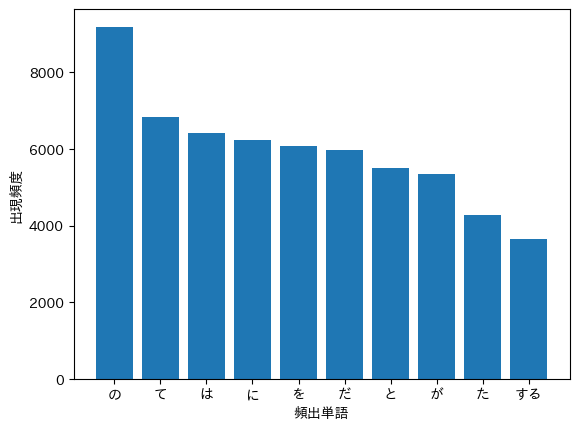

In [20]:
top10_words = [w[0] for w in ans[:10]]
top10_words_count = [w[1] for w in ans[:10]]

fig, ax = plt.subplots()
ax.bar(top10_words, top10_words_count)
ax.set_xlabel('頻出単語')
ax.set_ylabel('出現頻度')
plt.show()

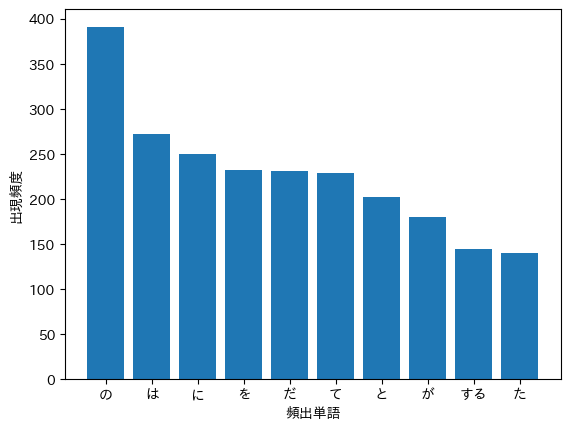

In [21]:
words = []
for morphs in results:
    if '猫' in [x['surface'] for x in morphs]:
        for morph in morphs:
            if morph['pos'] != '記号' and morph['surface'] != '猫':
                words.append(morph['base'])

c = Counter(words)
ans = c.most_common()

top10_words = [w[0] for w in ans[:10]]
top10_words_count = [w[1] for w in ans[:10]]

fig, ax = plt.subplots()
ax.bar(top10_words, top10_words_count)
ax.set_xlabel('頻出単語')
ax.set_ylabel('出現頻度')
plt.show()

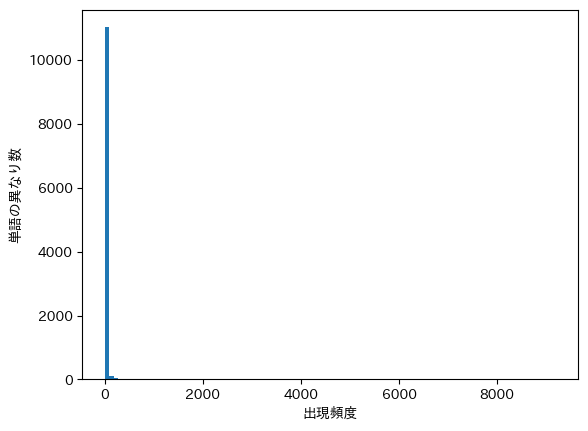

In [33]:
words = []
for morphs in results:
    for morph in morphs:
        if morph['pos'] != '記号':
            words.append(morph['base'])

c = Counter(words)
ans = c.values()

fig, ax = plt.subplots()
ax.hist(ans, bins=100)
ax.set_xlabel('出現頻度')
ax.set_ylabel('単語の異なり数')
plt.show()

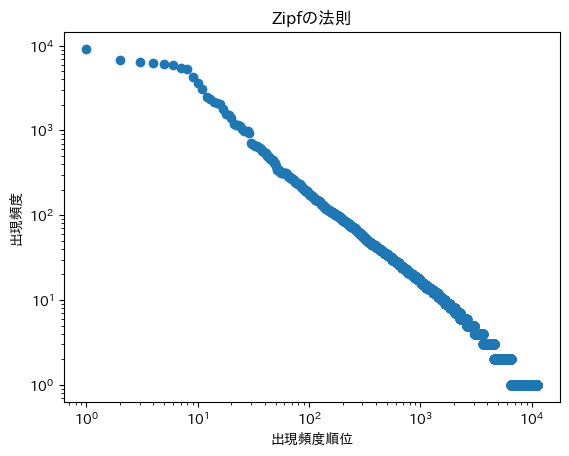

In [23]:
ans = sorted(list(ans), reverse=True)
order = [i + 1 for i in range(len(ans))]

fig, ax = plt.subplots()
ax.scatter(order, ans)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Zipfの法則')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()